In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_38520\499694536.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

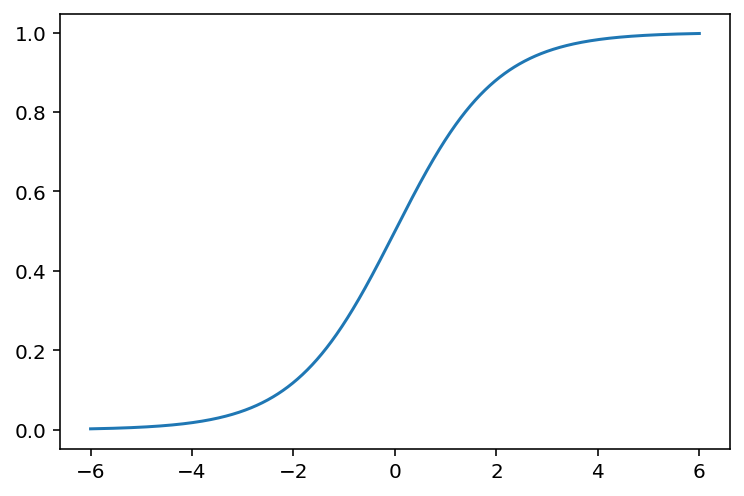

In [2]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1001)
y = 1/(1+np.exp(-x))
_ = plt.plot(x, y)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', LogisticRegression())]

log_reg = Pipeline(steps=steps)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9565217391304348

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', SGDClassifier(loss='log_loss', max_iter=100))]

sgd_clf = Pipeline(steps=steps)
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_test, y_test)

0.9565217391304348

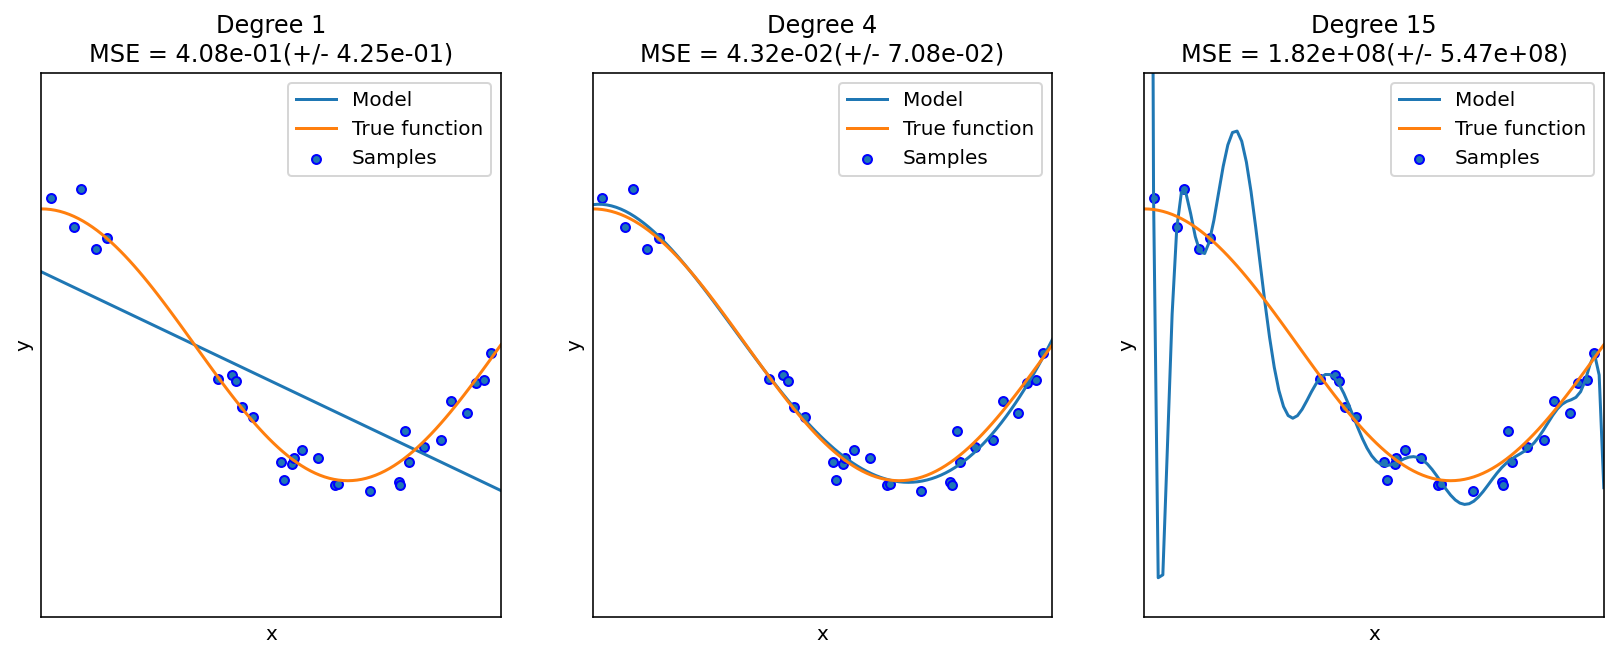

In [6]:
#| echo: false
#| column: page
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
# plt.show()

In [7]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

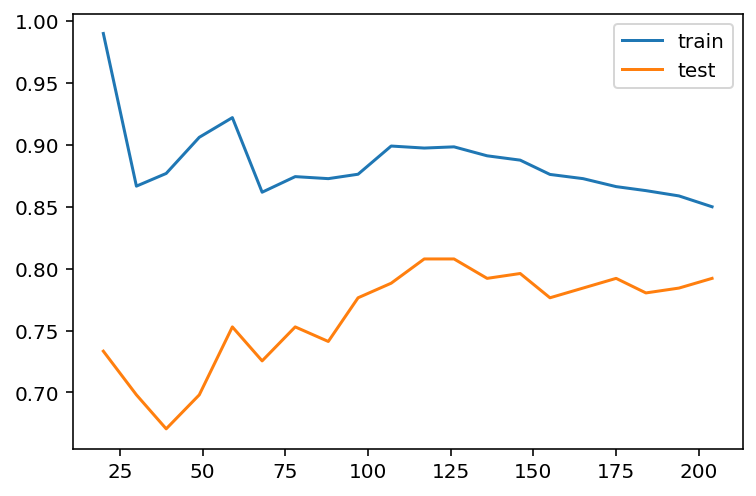

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = LogisticRegression(max_iter=1000)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

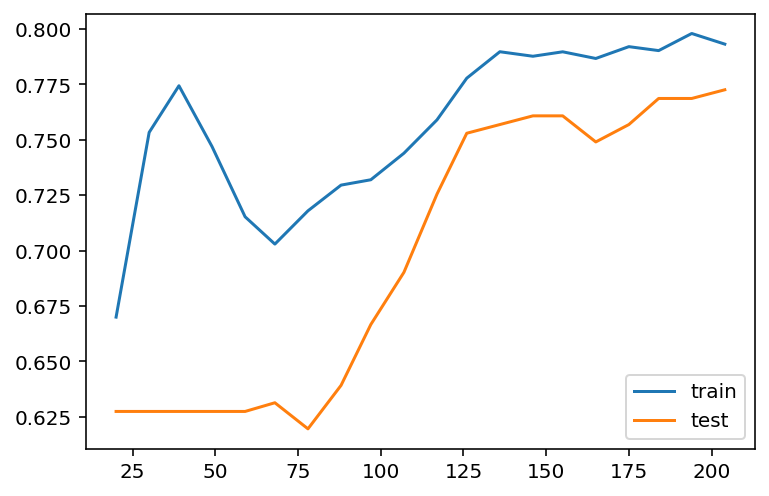

In [9]:
clf = LogisticRegression(max_iter=1000, C=0.1)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

In [10]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [12]:
#| output: false
import keras_core as keras
from keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))

Using TensorFlow backend


Epoch 1/400


1/9 [==>...........................] - ETA: 3s - loss: 0.6762 - accuracy: 0.7000

9/9 [==============================] - 1s 27ms/step - loss: 0.7136 - accuracy: 0.5490 - val_loss: 0.6648 - val_accuracy: 0.6667


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7786 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.5647 - val_loss: 0.6595 - val_accuracy: 0.6889


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7101 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.7042 - accuracy: 0.5725 - val_loss: 0.6541 - val_accuracy: 0.6889


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7399 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.7006 - accuracy: 0.5765 - val_loss: 0.6493 - val_accuracy: 0.6889


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7869 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6977 - accuracy: 0.5765 - val_loss: 0.6459 - val_accuracy: 0.6889


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.5843 - val_loss: 0.6431 - val_accuracy: 0.6889


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7240 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6922 - accuracy: 0.5961 - val_loss: 0.6408 - val_accuracy: 0.6889


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6034 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.5961 - val_loss: 0.6386 - val_accuracy: 0.6889


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7418 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5961 - val_loss: 0.6369 - val_accuracy: 0.6889


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6343 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5961 - val_loss: 0.6346 - val_accuracy: 0.6889


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.6000 - val_loss: 0.6330 - val_accuracy: 0.6889


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5650 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.6039 - val_loss: 0.6308 - val_accuracy: 0.6889


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.6039 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6937 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.6078 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6468 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6752 - accuracy: 0.6039 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6241 - val_accuracy: 0.6667


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5979 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6714 - accuracy: 0.6039 - val_loss: 0.6222 - val_accuracy: 0.6667


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5540 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.6157 - val_loss: 0.6214 - val_accuracy: 0.6667


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.6157 - val_loss: 0.6201 - val_accuracy: 0.6667


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6657 - accuracy: 0.6157 - val_loss: 0.6192 - val_accuracy: 0.6667


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6640 - accuracy: 0.6118 - val_loss: 0.6188 - val_accuracy: 0.6667


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5995 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.6118 - val_loss: 0.6180 - val_accuracy: 0.6667


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6192 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6604 - accuracy: 0.6078 - val_loss: 0.6171 - val_accuracy: 0.6667


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6390 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6587 - accuracy: 0.6078 - val_loss: 0.6163 - val_accuracy: 0.6667


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.6078 - val_loss: 0.6148 - val_accuracy: 0.6667


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6554 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6552 - accuracy: 0.6078 - val_loss: 0.6140 - val_accuracy: 0.6889


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6393 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6536 - accuracy: 0.6118 - val_loss: 0.6130 - val_accuracy: 0.6889


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5698 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.6519 - accuracy: 0.6157 - val_loss: 0.6119 - val_accuracy: 0.6889


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6421 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6157 - val_loss: 0.6110 - val_accuracy: 0.6889


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6713 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6118 - val_loss: 0.6102 - val_accuracy: 0.6889


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6472 - accuracy: 0.6118 - val_loss: 0.6084 - val_accuracy: 0.6889


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7070 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6457 - accuracy: 0.6118 - val_loss: 0.6074 - val_accuracy: 0.6667


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6817 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6440 - accuracy: 0.6118 - val_loss: 0.6066 - val_accuracy: 0.6667


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5606 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6427 - accuracy: 0.6118 - val_loss: 0.6053 - val_accuracy: 0.6667


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5709 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6409 - accuracy: 0.6118 - val_loss: 0.6051 - val_accuracy: 0.6667


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6649 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6395 - accuracy: 0.6039 - val_loss: 0.6050 - val_accuracy: 0.6667


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7100 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.6039 - val_loss: 0.6045 - val_accuracy: 0.6667


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6549 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6366 - accuracy: 0.6118 - val_loss: 0.6041 - val_accuracy: 0.6667


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6536 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6351 - accuracy: 0.6118 - val_loss: 0.6033 - val_accuracy: 0.6667


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6219 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6337 - accuracy: 0.6157 - val_loss: 0.6024 - val_accuracy: 0.6667


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6323 - accuracy: 0.6157 - val_loss: 0.6013 - val_accuracy: 0.6667


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5108 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6308 - accuracy: 0.6118 - val_loss: 0.6002 - val_accuracy: 0.6667


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6428 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6295 - accuracy: 0.6118 - val_loss: 0.5991 - val_accuracy: 0.6667


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7171 - accuracy: 0.4667

9/9 [==============================] - 0s 7ms/step - loss: 0.6281 - accuracy: 0.6118 - val_loss: 0.5987 - val_accuracy: 0.6667


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6268 - accuracy: 0.6118 - val_loss: 0.5981 - val_accuracy: 0.6667


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6255 - accuracy: 0.6078 - val_loss: 0.5976 - val_accuracy: 0.6667


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.6118 - val_loss: 0.5967 - val_accuracy: 0.6667


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6229 - accuracy: 0.6157 - val_loss: 0.5960 - val_accuracy: 0.6667


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6601 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6216 - accuracy: 0.6196 - val_loss: 0.5949 - val_accuracy: 0.6667


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7067 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6204 - accuracy: 0.6235 - val_loss: 0.5945 - val_accuracy: 0.6667


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6191 - accuracy: 0.6196 - val_loss: 0.5941 - val_accuracy: 0.6667


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5577 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6178 - accuracy: 0.6235 - val_loss: 0.5936 - val_accuracy: 0.6667


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6165 - accuracy: 0.6235 - val_loss: 0.5924 - val_accuracy: 0.6667


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6153 - accuracy: 0.6275 - val_loss: 0.5918 - val_accuracy: 0.6889


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6890 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6141 - accuracy: 0.6275 - val_loss: 0.5913 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6539 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.6353 - val_loss: 0.5904 - val_accuracy: 0.6889


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6550 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6118 - accuracy: 0.6392 - val_loss: 0.5895 - val_accuracy: 0.6889


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6680 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.6392 - val_loss: 0.5887 - val_accuracy: 0.6889


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5001 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6095 - accuracy: 0.6431 - val_loss: 0.5887 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6082 - accuracy: 0.6431 - val_loss: 0.5884 - val_accuracy: 0.6889


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6016 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6073 - accuracy: 0.6431 - val_loss: 0.5875 - val_accuracy: 0.7111


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6060 - accuracy: 0.6431 - val_loss: 0.5874 - val_accuracy: 0.7111


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6049 - accuracy: 0.6392 - val_loss: 0.5869 - val_accuracy: 0.7111


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.6431 - val_loss: 0.5863 - val_accuracy: 0.7111


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5832 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.6353 - val_loss: 0.5862 - val_accuracy: 0.7111


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6017 - accuracy: 0.6353 - val_loss: 0.5854 - val_accuracy: 0.6889


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4516 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.6005 - accuracy: 0.6392 - val_loss: 0.5849 - val_accuracy: 0.6889


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7478 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.5998 - accuracy: 0.6392 - val_loss: 0.5855 - val_accuracy: 0.6889


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5681 - accuracy: 0.7000

9/9 [==============================] - 0s 8ms/step - loss: 0.5984 - accuracy: 0.6392 - val_loss: 0.5852 - val_accuracy: 0.6889


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6763 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.5974 - accuracy: 0.6431 - val_loss: 0.5849 - val_accuracy: 0.6889


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6160 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5964 - accuracy: 0.6392 - val_loss: 0.5848 - val_accuracy: 0.6889


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5452 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5955 - accuracy: 0.6392 - val_loss: 0.5841 - val_accuracy: 0.6889


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5943 - accuracy: 0.6392 - val_loss: 0.5839 - val_accuracy: 0.6889


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5902 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.6431 - val_loss: 0.5836 - val_accuracy: 0.6889


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5554 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5924 - accuracy: 0.6471 - val_loss: 0.5827 - val_accuracy: 0.6889


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6249 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5913 - accuracy: 0.6471 - val_loss: 0.5822 - val_accuracy: 0.6889


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.5904 - accuracy: 0.6471 - val_loss: 0.5814 - val_accuracy: 0.6889


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5303 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5895 - accuracy: 0.6471 - val_loss: 0.5809 - val_accuracy: 0.6889


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6687 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.5885 - accuracy: 0.6471 - val_loss: 0.5803 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.5877 - accuracy: 0.6549 - val_loss: 0.5804 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5865 - accuracy: 0.6549 - val_loss: 0.5799 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.6588 - val_loss: 0.5788 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.6627 - val_loss: 0.5787 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6091 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5837 - accuracy: 0.6667 - val_loss: 0.5786 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5829 - accuracy: 0.6667 - val_loss: 0.5788 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5819 - accuracy: 0.6706 - val_loss: 0.5781 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5655 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.6706 - val_loss: 0.5782 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5802 - accuracy: 0.6706 - val_loss: 0.5775 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6085 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.5793 - accuracy: 0.6706 - val_loss: 0.5774 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5783 - accuracy: 0.6706 - val_loss: 0.5770 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.6706 - val_loss: 0.5766 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5984 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.5766 - accuracy: 0.6706 - val_loss: 0.5762 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6162 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.5758 - accuracy: 0.6706 - val_loss: 0.5753 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5466 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.6745 - val_loss: 0.5749 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5540 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5741 - accuracy: 0.6863 - val_loss: 0.5743 - val_accuracy: 0.6889


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4937 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5735 - accuracy: 0.6784 - val_loss: 0.5731 - val_accuracy: 0.6889


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5724 - accuracy: 0.6863 - val_loss: 0.5734 - val_accuracy: 0.6889


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6060 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.5718 - accuracy: 0.6824 - val_loss: 0.5739 - val_accuracy: 0.6889


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5710 - accuracy: 0.6863 - val_loss: 0.5731 - val_accuracy: 0.6889


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5700 - accuracy: 0.6902 - val_loss: 0.5729 - val_accuracy: 0.6889


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.6980 - val_loss: 0.5727 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5393 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.5685 - accuracy: 0.7020 - val_loss: 0.5719 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.7020 - val_loss: 0.5714 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5670 - accuracy: 0.7020 - val_loss: 0.5716 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6164 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5662 - accuracy: 0.7020 - val_loss: 0.5715 - val_accuracy: 0.6667


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5559 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5655 - accuracy: 0.7020 - val_loss: 0.5707 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5646 - accuracy: 0.7020 - val_loss: 0.5706 - val_accuracy: 0.6667


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5639 - accuracy: 0.7020 - val_loss: 0.5705 - val_accuracy: 0.6667


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5632 - accuracy: 0.7020 - val_loss: 0.5699 - val_accuracy: 0.6667


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.5625 - accuracy: 0.7020 - val_loss: 0.5705 - val_accuracy: 0.6667


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6430 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5617 - accuracy: 0.7020 - val_loss: 0.5708 - val_accuracy: 0.6667


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5377 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.5608 - accuracy: 0.6980 - val_loss: 0.5701 - val_accuracy: 0.6667


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5052 - accuracy: 0.8000

9/9 [==============================] - 0s 8ms/step - loss: 0.5603 - accuracy: 0.7020 - val_loss: 0.5693 - val_accuracy: 0.6667


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5594 - accuracy: 0.7020 - val_loss: 0.5693 - val_accuracy: 0.6667


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4235 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5587 - accuracy: 0.7020 - val_loss: 0.5686 - val_accuracy: 0.6889


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6424 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.5581 - accuracy: 0.7020 - val_loss: 0.5687 - val_accuracy: 0.6667


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5669 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5573 - accuracy: 0.7098 - val_loss: 0.5684 - val_accuracy: 0.6889


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5463 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5566 - accuracy: 0.7098 - val_loss: 0.5679 - val_accuracy: 0.6889


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5559 - accuracy: 0.7059 - val_loss: 0.5683 - val_accuracy: 0.6889


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5041 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5553 - accuracy: 0.7020 - val_loss: 0.5679 - val_accuracy: 0.6889


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4938 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5545 - accuracy: 0.7020 - val_loss: 0.5676 - val_accuracy: 0.6889


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5538 - accuracy: 0.7059 - val_loss: 0.5677 - val_accuracy: 0.6889


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.5533 - accuracy: 0.7059 - val_loss: 0.5681 - val_accuracy: 0.6667


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.5525 - accuracy: 0.7098 - val_loss: 0.5674 - val_accuracy: 0.6667


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5581 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5518 - accuracy: 0.7137 - val_loss: 0.5671 - val_accuracy: 0.6667


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6082 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5511 - accuracy: 0.7137 - val_loss: 0.5668 - val_accuracy: 0.6667


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5505 - accuracy: 0.7137 - val_loss: 0.5668 - val_accuracy: 0.6667


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5246 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5498 - accuracy: 0.7137 - val_loss: 0.5665 - val_accuracy: 0.6667


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.7137 - val_loss: 0.5664 - val_accuracy: 0.6667


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.7137 - val_loss: 0.5662 - val_accuracy: 0.6667


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5808 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5479 - accuracy: 0.7137 - val_loss: 0.5658 - val_accuracy: 0.6667


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6191 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5473 - accuracy: 0.7137 - val_loss: 0.5654 - val_accuracy: 0.6667


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.7137 - val_loss: 0.5654 - val_accuracy: 0.6667


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5515 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5461 - accuracy: 0.7137 - val_loss: 0.5648 - val_accuracy: 0.6667


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5392 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5455 - accuracy: 0.7137 - val_loss: 0.5652 - val_accuracy: 0.6667


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7216 - val_loss: 0.5652 - val_accuracy: 0.6667


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5442 - accuracy: 0.7216 - val_loss: 0.5646 - val_accuracy: 0.6889


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5437 - accuracy: 0.7176 - val_loss: 0.5636 - val_accuracy: 0.6889


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4998 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5431 - accuracy: 0.7216 - val_loss: 0.5641 - val_accuracy: 0.6889


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6703 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5424 - accuracy: 0.7216 - val_loss: 0.5641 - val_accuracy: 0.6889


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5510 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.5420 - accuracy: 0.7255 - val_loss: 0.5643 - val_accuracy: 0.6889


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4885 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5412 - accuracy: 0.7255 - val_loss: 0.5643 - val_accuracy: 0.6889


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5922 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5406 - accuracy: 0.7255 - val_loss: 0.5638 - val_accuracy: 0.6889


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5999 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5401 - accuracy: 0.7294 - val_loss: 0.5642 - val_accuracy: 0.7111


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4983 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5395 - accuracy: 0.7333 - val_loss: 0.5642 - val_accuracy: 0.7111


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5390 - accuracy: 0.7333 - val_loss: 0.5638 - val_accuracy: 0.7111


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5697 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5384 - accuracy: 0.7333 - val_loss: 0.5639 - val_accuracy: 0.7333


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5200 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.5379 - accuracy: 0.7294 - val_loss: 0.5642 - val_accuracy: 0.7333


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5290 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5373 - accuracy: 0.7294 - val_loss: 0.5632 - val_accuracy: 0.7333


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.7294 - val_loss: 0.5632 - val_accuracy: 0.7333


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5361 - accuracy: 0.7333 - val_loss: 0.5628 - val_accuracy: 0.7333


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3820 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.7373 - val_loss: 0.5623 - val_accuracy: 0.7333


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5617 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5351 - accuracy: 0.7373 - val_loss: 0.5619 - val_accuracy: 0.7333


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5345 - accuracy: 0.7373 - val_loss: 0.5620 - val_accuracy: 0.7333


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5116 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.5340 - accuracy: 0.7333 - val_loss: 0.5620 - val_accuracy: 0.7333


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5335 - accuracy: 0.7333 - val_loss: 0.5614 - val_accuracy: 0.7333


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6539 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5329 - accuracy: 0.7333 - val_loss: 0.5612 - val_accuracy: 0.7333


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5876 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5325 - accuracy: 0.7373 - val_loss: 0.5605 - val_accuracy: 0.7333


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.5320 - accuracy: 0.7373 - val_loss: 0.5599 - val_accuracy: 0.7333


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5314 - accuracy: 0.7333 - val_loss: 0.5603 - val_accuracy: 0.7333


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5308 - accuracy: 0.7333 - val_loss: 0.5602 - val_accuracy: 0.7333


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5097 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.7373 - val_loss: 0.5594 - val_accuracy: 0.7333


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5184 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5298 - accuracy: 0.7373 - val_loss: 0.5594 - val_accuracy: 0.7333


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.7412 - val_loss: 0.5595 - val_accuracy: 0.7333


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5288 - accuracy: 0.7412 - val_loss: 0.5589 - val_accuracy: 0.7333


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5282 - accuracy: 0.7373 - val_loss: 0.5593 - val_accuracy: 0.7333


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5278 - accuracy: 0.7490 - val_loss: 0.5592 - val_accuracy: 0.7333


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6073 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5272 - accuracy: 0.7490 - val_loss: 0.5589 - val_accuracy: 0.7111


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5267 - accuracy: 0.7490 - val_loss: 0.5585 - val_accuracy: 0.7111


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4510 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.7490 - val_loss: 0.5581 - val_accuracy: 0.7111


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5258 - accuracy: 0.7529 - val_loss: 0.5581 - val_accuracy: 0.7111


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5690 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5252 - accuracy: 0.7490 - val_loss: 0.5584 - val_accuracy: 0.7111


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5248 - accuracy: 0.7490 - val_loss: 0.5583 - val_accuracy: 0.7111


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5232 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5243 - accuracy: 0.7490 - val_loss: 0.5586 - val_accuracy: 0.7111


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.5238 - accuracy: 0.7490 - val_loss: 0.5584 - val_accuracy: 0.7111


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5233 - accuracy: 0.7490 - val_loss: 0.5580 - val_accuracy: 0.7111


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4423 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5229 - accuracy: 0.7490 - val_loss: 0.5577 - val_accuracy: 0.7111


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7490 - val_loss: 0.5573 - val_accuracy: 0.7111


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.5219 - accuracy: 0.7490 - val_loss: 0.5573 - val_accuracy: 0.7111


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4828 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5215 - accuracy: 0.7490 - val_loss: 0.5576 - val_accuracy: 0.7111


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.5210 - accuracy: 0.7490 - val_loss: 0.5574 - val_accuracy: 0.7111


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5530 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5206 - accuracy: 0.7490 - val_loss: 0.5572 - val_accuracy: 0.7111


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5610 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7490 - val_loss: 0.5573 - val_accuracy: 0.7111


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5196 - accuracy: 0.7490 - val_loss: 0.5567 - val_accuracy: 0.7111


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5167 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5193 - accuracy: 0.7490 - val_loss: 0.5569 - val_accuracy: 0.7111


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5416 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.5187 - accuracy: 0.7529 - val_loss: 0.5567 - val_accuracy: 0.7111


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5183 - accuracy: 0.7529 - val_loss: 0.5564 - val_accuracy: 0.7111


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5179 - accuracy: 0.7529 - val_loss: 0.5564 - val_accuracy: 0.7111


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5158 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5174 - accuracy: 0.7529 - val_loss: 0.5563 - val_accuracy: 0.7111


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4889 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5169 - accuracy: 0.7529 - val_loss: 0.5562 - val_accuracy: 0.7111


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4926 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5164 - accuracy: 0.7569 - val_loss: 0.5560 - val_accuracy: 0.7111


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4439 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.5161 - accuracy: 0.7569 - val_loss: 0.5563 - val_accuracy: 0.7111


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5137 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5156 - accuracy: 0.7608 - val_loss: 0.5560 - val_accuracy: 0.7111


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4862 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.7608 - val_loss: 0.5561 - val_accuracy: 0.7111


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5771 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5147 - accuracy: 0.7608 - val_loss: 0.5556 - val_accuracy: 0.7111


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6018 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5144 - accuracy: 0.7608 - val_loss: 0.5557 - val_accuracy: 0.7111


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4088 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5140 - accuracy: 0.7608 - val_loss: 0.5547 - val_accuracy: 0.7111


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4479 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.5134 - accuracy: 0.7608 - val_loss: 0.5548 - val_accuracy: 0.7111


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5129 - accuracy: 0.7608 - val_loss: 0.5552 - val_accuracy: 0.7111


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6188 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.5126 - accuracy: 0.7647 - val_loss: 0.5563 - val_accuracy: 0.7111


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5122 - accuracy: 0.7647 - val_loss: 0.5559 - val_accuracy: 0.7111


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5187 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5118 - accuracy: 0.7647 - val_loss: 0.5565 - val_accuracy: 0.7111


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4474 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5113 - accuracy: 0.7647 - val_loss: 0.5559 - val_accuracy: 0.7111


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4547 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5111 - accuracy: 0.7647 - val_loss: 0.5567 - val_accuracy: 0.7111


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5928 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.7647 - val_loss: 0.5566 - val_accuracy: 0.7111


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5101 - accuracy: 0.7647 - val_loss: 0.5556 - val_accuracy: 0.7111


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5190 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.7647 - val_loss: 0.5544 - val_accuracy: 0.7111


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4631 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5093 - accuracy: 0.7647 - val_loss: 0.5543 - val_accuracy: 0.7111


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.5089 - accuracy: 0.7647 - val_loss: 0.5545 - val_accuracy: 0.7111


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.7647 - val_loss: 0.5542 - val_accuracy: 0.7111


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4667 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5081 - accuracy: 0.7647 - val_loss: 0.5541 - val_accuracy: 0.7111


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5078 - accuracy: 0.7647 - val_loss: 0.5542 - val_accuracy: 0.7111


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5266 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7647 - val_loss: 0.5536 - val_accuracy: 0.7111


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.5070 - accuracy: 0.7647 - val_loss: 0.5532 - val_accuracy: 0.7111


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4639 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5068 - accuracy: 0.7647 - val_loss: 0.5542 - val_accuracy: 0.7111


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4756 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5062 - accuracy: 0.7647 - val_loss: 0.5537 - val_accuracy: 0.7111


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6053 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.7647 - val_loss: 0.5534 - val_accuracy: 0.7111


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5054 - accuracy: 0.7647 - val_loss: 0.5529 - val_accuracy: 0.7111


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5051 - accuracy: 0.7647 - val_loss: 0.5523 - val_accuracy: 0.7111


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5718 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5048 - accuracy: 0.7686 - val_loss: 0.5520 - val_accuracy: 0.7111


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5043 - accuracy: 0.7686 - val_loss: 0.5526 - val_accuracy: 0.7111


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5038 - accuracy: 0.7647 - val_loss: 0.5530 - val_accuracy: 0.7111


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6373 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.5036 - accuracy: 0.7686 - val_loss: 0.5533 - val_accuracy: 0.7111


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4613 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5032 - accuracy: 0.7686 - val_loss: 0.5536 - val_accuracy: 0.7111


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.5029 - accuracy: 0.7725 - val_loss: 0.5538 - val_accuracy: 0.7111


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5845 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.7725 - val_loss: 0.5530 - val_accuracy: 0.7111


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5022 - accuracy: 0.7686 - val_loss: 0.5521 - val_accuracy: 0.7111


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6818 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5017 - accuracy: 0.7686 - val_loss: 0.5527 - val_accuracy: 0.7111


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.5013 - accuracy: 0.7725 - val_loss: 0.5520 - val_accuracy: 0.7111


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5049 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5009 - accuracy: 0.7725 - val_loss: 0.5522 - val_accuracy: 0.7111


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5659 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5007 - accuracy: 0.7765 - val_loss: 0.5514 - val_accuracy: 0.7111


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4910 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5003 - accuracy: 0.7765 - val_loss: 0.5517 - val_accuracy: 0.7111


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5000 - accuracy: 0.7804 - val_loss: 0.5523 - val_accuracy: 0.7111


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4995 - accuracy: 0.7765 - val_loss: 0.5522 - val_accuracy: 0.7111


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4251 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4992 - accuracy: 0.7765 - val_loss: 0.5519 - val_accuracy: 0.7111


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4988 - accuracy: 0.7765 - val_loss: 0.5519 - val_accuracy: 0.7111


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5440 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4985 - accuracy: 0.7765 - val_loss: 0.5522 - val_accuracy: 0.7111


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4115 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4981 - accuracy: 0.7804 - val_loss: 0.5515 - val_accuracy: 0.7111


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4736 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4977 - accuracy: 0.7804 - val_loss: 0.5512 - val_accuracy: 0.7111


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4975 - accuracy: 0.7804 - val_loss: 0.5512 - val_accuracy: 0.7111


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4972 - accuracy: 0.7804 - val_loss: 0.5516 - val_accuracy: 0.7111


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4254 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4968 - accuracy: 0.7804 - val_loss: 0.5512 - val_accuracy: 0.7111


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5179 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4964 - accuracy: 0.7765 - val_loss: 0.5517 - val_accuracy: 0.7111


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4735 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4960 - accuracy: 0.7804 - val_loss: 0.5514 - val_accuracy: 0.7111


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5832 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4957 - accuracy: 0.7804 - val_loss: 0.5515 - val_accuracy: 0.7111


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4834 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7804 - val_loss: 0.5514 - val_accuracy: 0.7111


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5075 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.7804 - val_loss: 0.5511 - val_accuracy: 0.7111


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4947 - accuracy: 0.7804 - val_loss: 0.5506 - val_accuracy: 0.7111


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4876 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4944 - accuracy: 0.7804 - val_loss: 0.5505 - val_accuracy: 0.7111


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4940 - accuracy: 0.7804 - val_loss: 0.5499 - val_accuracy: 0.7111


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4936 - accuracy: 0.7804 - val_loss: 0.5503 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4934 - accuracy: 0.7804 - val_loss: 0.5504 - val_accuracy: 0.6889


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4932 - accuracy: 0.7804 - val_loss: 0.5508 - val_accuracy: 0.6667


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4927 - accuracy: 0.7804 - val_loss: 0.5501 - val_accuracy: 0.6889


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.7804 - val_loss: 0.5499 - val_accuracy: 0.6889


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4199 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4921 - accuracy: 0.7804 - val_loss: 0.5493 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4917 - accuracy: 0.7804 - val_loss: 0.5492 - val_accuracy: 0.6889


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5593 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.7765 - val_loss: 0.5492 - val_accuracy: 0.6889


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5197 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.4911 - accuracy: 0.7765 - val_loss: 0.5490 - val_accuracy: 0.6889


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5579 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.7765 - val_loss: 0.5489 - val_accuracy: 0.6889


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4905 - accuracy: 0.7804 - val_loss: 0.5491 - val_accuracy: 0.6889


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6214 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7765 - val_loss: 0.5491 - val_accuracy: 0.6889


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4420 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4899 - accuracy: 0.7843 - val_loss: 0.5482 - val_accuracy: 0.6889


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4895 - accuracy: 0.7843 - val_loss: 0.5485 - val_accuracy: 0.6889


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5892 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.7804 - val_loss: 0.5484 - val_accuracy: 0.6889


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4657 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4891 - accuracy: 0.7804 - val_loss: 0.5494 - val_accuracy: 0.6889


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7804 - val_loss: 0.5494 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4978 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4884 - accuracy: 0.7765 - val_loss: 0.5499 - val_accuracy: 0.6889


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5728 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4879 - accuracy: 0.7765 - val_loss: 0.5494 - val_accuracy: 0.6889


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4876 - accuracy: 0.7804 - val_loss: 0.5490 - val_accuracy: 0.6889


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4873 - accuracy: 0.7804 - val_loss: 0.5489 - val_accuracy: 0.6889


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4870 - accuracy: 0.7804 - val_loss: 0.5485 - val_accuracy: 0.6889


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4868 - accuracy: 0.7804 - val_loss: 0.5481 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5969 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4864 - accuracy: 0.7804 - val_loss: 0.5486 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4861 - accuracy: 0.7804 - val_loss: 0.5487 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4936 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4858 - accuracy: 0.7804 - val_loss: 0.5497 - val_accuracy: 0.6889


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4855 - accuracy: 0.7804 - val_loss: 0.5498 - val_accuracy: 0.6889


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.7843 - val_loss: 0.5505 - val_accuracy: 0.6889


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7843 - val_loss: 0.5501 - val_accuracy: 0.6889


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5089 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4847 - accuracy: 0.7843 - val_loss: 0.5490 - val_accuracy: 0.6889


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.4845 - accuracy: 0.7843 - val_loss: 0.5495 - val_accuracy: 0.6889


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5224 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4839 - accuracy: 0.7843 - val_loss: 0.5488 - val_accuracy: 0.6889


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7804 - val_loss: 0.5476 - val_accuracy: 0.6889


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.7804 - val_loss: 0.5476 - val_accuracy: 0.6889


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3774 - accuracy: 0.9333

9/9 [==============================] - 0s 6ms/step - loss: 0.4832 - accuracy: 0.7804 - val_loss: 0.5473 - val_accuracy: 0.6889


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4829 - accuracy: 0.7804 - val_loss: 0.5470 - val_accuracy: 0.6889


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.9333

9/9 [==============================] - 0s 6ms/step - loss: 0.4826 - accuracy: 0.7804 - val_loss: 0.5465 - val_accuracy: 0.6889


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5818 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.4823 - accuracy: 0.7804 - val_loss: 0.5464 - val_accuracy: 0.6889


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4541 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4820 - accuracy: 0.7804 - val_loss: 0.5458 - val_accuracy: 0.6889


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4817 - accuracy: 0.7804 - val_loss: 0.5458 - val_accuracy: 0.6889


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4823 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4814 - accuracy: 0.7843 - val_loss: 0.5462 - val_accuracy: 0.6889


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5597 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.7843 - val_loss: 0.5464 - val_accuracy: 0.6889


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5447 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.7843 - val_loss: 0.5464 - val_accuracy: 0.6889


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4805 - accuracy: 0.7882 - val_loss: 0.5466 - val_accuracy: 0.7111


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4802 - accuracy: 0.7882 - val_loss: 0.5469 - val_accuracy: 0.7111


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4880 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4800 - accuracy: 0.7882 - val_loss: 0.5475 - val_accuracy: 0.7111


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5112 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7882 - val_loss: 0.5476 - val_accuracy: 0.7111


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.9667

9/9 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 0.7882 - val_loss: 0.5471 - val_accuracy: 0.7111


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4792 - accuracy: 0.7882 - val_loss: 0.5471 - val_accuracy: 0.7111


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4565 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4790 - accuracy: 0.7882 - val_loss: 0.5464 - val_accuracy: 0.7111


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4242 - accuracy: 0.9000

9/9 [==============================] - 0s 6ms/step - loss: 0.4786 - accuracy: 0.7882 - val_loss: 0.5467 - val_accuracy: 0.7111


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4995 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4784 - accuracy: 0.7882 - val_loss: 0.5464 - val_accuracy: 0.7111


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4707 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7882 - val_loss: 0.5471 - val_accuracy: 0.7111


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.7882 - val_loss: 0.5475 - val_accuracy: 0.7111


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7922 - val_loss: 0.5470 - val_accuracy: 0.7111


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.7882 - val_loss: 0.5459 - val_accuracy: 0.7111


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4769 - accuracy: 0.7882 - val_loss: 0.5459 - val_accuracy: 0.7111


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.7882 - val_loss: 0.5460 - val_accuracy: 0.7111


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4685 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4764 - accuracy: 0.7922 - val_loss: 0.5462 - val_accuracy: 0.7111


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4761 - accuracy: 0.7922 - val_loss: 0.5462 - val_accuracy: 0.7111


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4759 - accuracy: 0.7922 - val_loss: 0.5461 - val_accuracy: 0.7111


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5679 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4756 - accuracy: 0.7922 - val_loss: 0.5463 - val_accuracy: 0.7111


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4753 - accuracy: 0.7922 - val_loss: 0.5459 - val_accuracy: 0.7111


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.9667

9/9 [==============================] - 0s 8ms/step - loss: 0.4751 - accuracy: 0.7922 - val_loss: 0.5453 - val_accuracy: 0.7111


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4748 - accuracy: 0.7922 - val_loss: 0.5455 - val_accuracy: 0.7111


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.8667

9/9 [==============================] - 0s 7ms/step - loss: 0.4746 - accuracy: 0.7922 - val_loss: 0.5452 - val_accuracy: 0.7111


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4989 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.4743 - accuracy: 0.7922 - val_loss: 0.5458 - val_accuracy: 0.7111


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4741 - accuracy: 0.7961 - val_loss: 0.5464 - val_accuracy: 0.7111


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.7961 - val_loss: 0.5462 - val_accuracy: 0.7111


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4127 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4737 - accuracy: 0.7961 - val_loss: 0.5456 - val_accuracy: 0.7111


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4906 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4733 - accuracy: 0.7961 - val_loss: 0.5457 - val_accuracy: 0.7111


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4998 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4731 - accuracy: 0.7961 - val_loss: 0.5448 - val_accuracy: 0.7111


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.7961 - val_loss: 0.5454 - val_accuracy: 0.7111


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6652 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.4726 - accuracy: 0.7961 - val_loss: 0.5458 - val_accuracy: 0.7111


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.4722 - accuracy: 0.7961 - val_loss: 0.5456 - val_accuracy: 0.7111


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4719 - accuracy: 0.7961 - val_loss: 0.5456 - val_accuracy: 0.7111


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5420 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4718 - accuracy: 0.7961 - val_loss: 0.5450 - val_accuracy: 0.7111


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4562 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4715 - accuracy: 0.7961 - val_loss: 0.5457 - val_accuracy: 0.7111


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4544 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4712 - accuracy: 0.7961 - val_loss: 0.5452 - val_accuracy: 0.7111


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4710 - accuracy: 0.7961 - val_loss: 0.5450 - val_accuracy: 0.7111


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4576 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4709 - accuracy: 0.7961 - val_loss: 0.5455 - val_accuracy: 0.7111


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4995 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.7961 - val_loss: 0.5446 - val_accuracy: 0.7111


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.4703 - accuracy: 0.7961 - val_loss: 0.5443 - val_accuracy: 0.7111


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.9000

9/9 [==============================] - 0s 8ms/step - loss: 0.4701 - accuracy: 0.7961 - val_loss: 0.5438 - val_accuracy: 0.7111


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4066 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4697 - accuracy: 0.7961 - val_loss: 0.5444 - val_accuracy: 0.7111


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.8000 - val_loss: 0.5450 - val_accuracy: 0.7111


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.8000 - val_loss: 0.5451 - val_accuracy: 0.7111


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5765 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4690 - accuracy: 0.8039 - val_loss: 0.5458 - val_accuracy: 0.7111


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5461 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.8118 - val_loss: 0.5461 - val_accuracy: 0.7111


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4686 - accuracy: 0.8118 - val_loss: 0.5464 - val_accuracy: 0.7111


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5736 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.4685 - accuracy: 0.8118 - val_loss: 0.5476 - val_accuracy: 0.7111


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4682 - accuracy: 0.8118 - val_loss: 0.5473 - val_accuracy: 0.7111


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4680 - accuracy: 0.8118 - val_loss: 0.5464 - val_accuracy: 0.7111


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.8118 - val_loss: 0.5464 - val_accuracy: 0.7111


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4842 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.8118 - val_loss: 0.5472 - val_accuracy: 0.7111


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4673 - accuracy: 0.8118 - val_loss: 0.5459 - val_accuracy: 0.7111


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5100 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4670 - accuracy: 0.8118 - val_loss: 0.5455 - val_accuracy: 0.7111


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4669 - accuracy: 0.8118 - val_loss: 0.5443 - val_accuracy: 0.7111


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4664 - accuracy: 0.8118 - val_loss: 0.5443 - val_accuracy: 0.7111


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4662 - accuracy: 0.8118 - val_loss: 0.5438 - val_accuracy: 0.7111


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5502 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4660 - accuracy: 0.8118 - val_loss: 0.5429 - val_accuracy: 0.7111


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5181 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.8118 - val_loss: 0.5424 - val_accuracy: 0.7111


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4933 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.8078 - val_loss: 0.5425 - val_accuracy: 0.7111


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4529 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.8078 - val_loss: 0.5425 - val_accuracy: 0.7111


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4651 - accuracy: 0.8118 - val_loss: 0.5426 - val_accuracy: 0.7111


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8118 - val_loss: 0.5436 - val_accuracy: 0.7111


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4607 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.8118 - val_loss: 0.5437 - val_accuracy: 0.7111


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4644 - accuracy: 0.8118 - val_loss: 0.5433 - val_accuracy: 0.7111


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4642 - accuracy: 0.8118 - val_loss: 0.5436 - val_accuracy: 0.7111


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4796 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4640 - accuracy: 0.8118 - val_loss: 0.5438 - val_accuracy: 0.7111


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4639 - accuracy: 0.8118 - val_loss: 0.5428 - val_accuracy: 0.7111


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.9667

9/9 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.8118 - val_loss: 0.5434 - val_accuracy: 0.7111


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4146 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.8118 - val_loss: 0.5435 - val_accuracy: 0.7111


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4843 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4631 - accuracy: 0.8118 - val_loss: 0.5433 - val_accuracy: 0.7111


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4628 - accuracy: 0.8118 - val_loss: 0.5426 - val_accuracy: 0.7111


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4626 - accuracy: 0.8118 - val_loss: 0.5418 - val_accuracy: 0.7111


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4788 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.4624 - accuracy: 0.8118 - val_loss: 0.5419 - val_accuracy: 0.7111


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4361 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4622 - accuracy: 0.8078 - val_loss: 0.5416 - val_accuracy: 0.7111


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4620 - accuracy: 0.8078 - val_loss: 0.5418 - val_accuracy: 0.7111


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.8078 - val_loss: 0.5419 - val_accuracy: 0.7111


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.8078 - val_loss: 0.5418 - val_accuracy: 0.7111


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5036 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.8078 - val_loss: 0.5418 - val_accuracy: 0.7111


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4612 - accuracy: 0.8078 - val_loss: 0.5416 - val_accuracy: 0.7111


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.9667

9/9 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.8078 - val_loss: 0.5413 - val_accuracy: 0.7111


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5020 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4607 - accuracy: 0.8078 - val_loss: 0.5411 - val_accuracy: 0.7111


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.8078 - val_loss: 0.5401 - val_accuracy: 0.7111


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4603 - accuracy: 0.8078 - val_loss: 0.5408 - val_accuracy: 0.7111


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.8078 - val_loss: 0.5412 - val_accuracy: 0.7111


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4127 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4598 - accuracy: 0.8078 - val_loss: 0.5416 - val_accuracy: 0.7111


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5070 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 0.8078 - val_loss: 0.5419 - val_accuracy: 0.7111


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4595 - accuracy: 0.8078 - val_loss: 0.5412 - val_accuracy: 0.7111


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4592 - accuracy: 0.8078 - val_loss: 0.5414 - val_accuracy: 0.7111


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4765 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4590 - accuracy: 0.8078 - val_loss: 0.5411 - val_accuracy: 0.7111


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5659 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.8078 - val_loss: 0.5411 - val_accuracy: 0.7111


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4587 - accuracy: 0.8078 - val_loss: 0.5413 - val_accuracy: 0.7111


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4585 - accuracy: 0.8078 - val_loss: 0.5405 - val_accuracy: 0.7111


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8078 - val_loss: 0.5403 - val_accuracy: 0.7111


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4429 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.8078 - val_loss: 0.5408 - val_accuracy: 0.7111


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4810 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4578 - accuracy: 0.8078 - val_loss: 0.5410 - val_accuracy: 0.7111


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4521 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4577 - accuracy: 0.8078 - val_loss: 0.5404 - val_accuracy: 0.7111


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.9333

9/9 [==============================] - 0s 7ms/step - loss: 0.4574 - accuracy: 0.8078 - val_loss: 0.5401 - val_accuracy: 0.7111


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4572 - accuracy: 0.8078 - val_loss: 0.5399 - val_accuracy: 0.7111


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4570 - accuracy: 0.8078 - val_loss: 0.5400 - val_accuracy: 0.7111


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4223 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4568 - accuracy: 0.8078 - val_loss: 0.5400 - val_accuracy: 0.7111


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4567 - accuracy: 0.8078 - val_loss: 0.5410 - val_accuracy: 0.7111


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.8078 - val_loss: 0.5412 - val_accuracy: 0.7111


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4728 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4562 - accuracy: 0.8078 - val_loss: 0.5411 - val_accuracy: 0.7111


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.8078 - val_loss: 0.5411 - val_accuracy: 0.7111


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5229 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.8078 - val_loss: 0.5397 - val_accuracy: 0.7111


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5056 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.8078 - val_loss: 0.5399 - val_accuracy: 0.7111


In [13]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

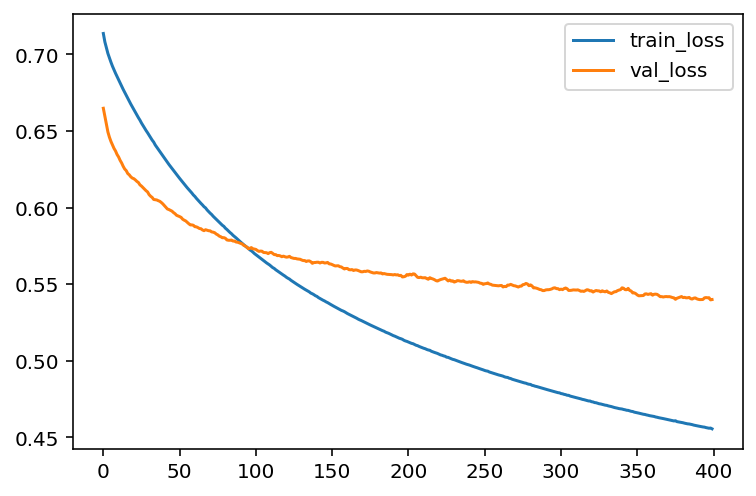

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

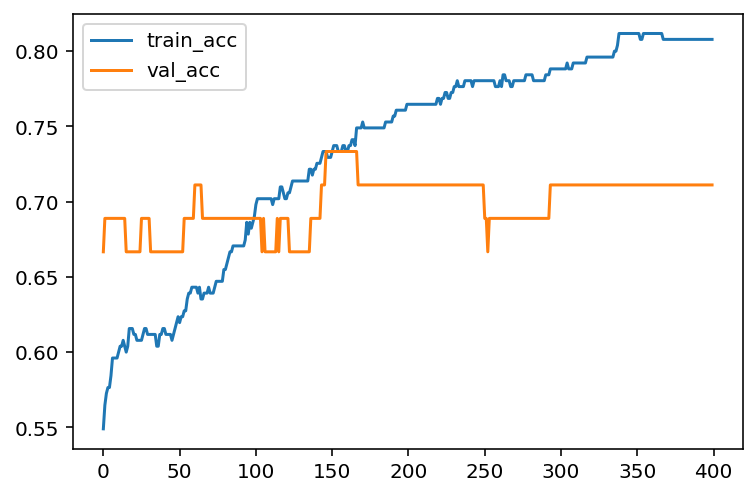

In [15]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [16]:
#| output: false
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))

Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 1.9490 - accuracy: 0.4333

9/9 [==============================] - 1s 24ms/step - loss: 1.8847 - accuracy: 0.3725 - val_loss: 1.7081 - val_accuracy: 0.3111


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 1.7046 - accuracy: 0.4000

9/9 [==============================] - 0s 8ms/step - loss: 1.6042 - accuracy: 0.3765 - val_loss: 1.4596 - val_accuracy: 0.3111


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 1.4461 - accuracy: 0.4000

9/9 [==============================] - 0s 8ms/step - loss: 1.3903 - accuracy: 0.3882 - val_loss: 1.2754 - val_accuracy: 0.3333


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 1.2415 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 1.2309 - accuracy: 0.4039 - val_loss: 1.1332 - val_accuracy: 0.4889


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 1.1313 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 1.1082 - accuracy: 0.4863 - val_loss: 1.0256 - val_accuracy: 0.5778


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0565 - accuracy: 0.4333

9/9 [==============================] - 0s 6ms/step - loss: 1.0150 - accuracy: 0.5608 - val_loss: 0.9426 - val_accuracy: 0.7333


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0123 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.9425 - accuracy: 0.6078 - val_loss: 0.8789 - val_accuracy: 0.7556


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9070 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.8865 - accuracy: 0.6353 - val_loss: 0.8304 - val_accuracy: 0.7778


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8410 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.8431 - accuracy: 0.6784 - val_loss: 0.7913 - val_accuracy: 0.7778


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8368 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.8081 - accuracy: 0.6784 - val_loss: 0.7597 - val_accuracy: 0.7556


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7929 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.7797 - accuracy: 0.6863 - val_loss: 0.7340 - val_accuracy: 0.7778


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7707 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.7567 - accuracy: 0.6549 - val_loss: 0.7139 - val_accuracy: 0.7111


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7512 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.7386 - accuracy: 0.6471 - val_loss: 0.6979 - val_accuracy: 0.6889


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7080 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.7235 - accuracy: 0.6353 - val_loss: 0.6854 - val_accuracy: 0.6889


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.7113 - accuracy: 0.6275 - val_loss: 0.6751 - val_accuracy: 0.6889


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7190 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.6314 - val_loss: 0.6665 - val_accuracy: 0.6889


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7237 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.6275 - val_loss: 0.6592 - val_accuracy: 0.6889


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6559 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.6275 - val_loss: 0.6535 - val_accuracy: 0.6889


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7101 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.6275 - val_loss: 0.6479 - val_accuracy: 0.6889


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6759 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6753 - accuracy: 0.6275 - val_loss: 0.6442 - val_accuracy: 0.6889


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6275 - val_loss: 0.6411 - val_accuracy: 0.6889


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6684 - accuracy: 0.6275 - val_loss: 0.6385 - val_accuracy: 0.6889


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6825 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6655 - accuracy: 0.6275 - val_loss: 0.6368 - val_accuracy: 0.6889


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6705 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.6275 - val_loss: 0.6350 - val_accuracy: 0.6889


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6776 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.6275 - val_loss: 0.6337 - val_accuracy: 0.6889


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6290 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.6275 - val_loss: 0.6325 - val_accuracy: 0.6889


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6747 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6586 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6575 - accuracy: 0.6275 - val_loss: 0.6309 - val_accuracy: 0.6889


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6656 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6783 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6559 - accuracy: 0.6275 - val_loss: 0.6303 - val_accuracy: 0.6889


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6948 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.6275 - val_loss: 0.6298 - val_accuracy: 0.6889


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6275 - val_loss: 0.6294 - val_accuracy: 0.6889


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.6275 - val_loss: 0.6289 - val_accuracy: 0.6889


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6805 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6540 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7363 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.6275 - val_loss: 0.6284 - val_accuracy: 0.6889


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6819 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6469 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6983 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6726 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7027 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5819 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6823 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7083 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7273 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6895 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7256 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6275 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6322 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6596 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5892 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6561 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6613 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6748 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5853 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6383 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6502 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6466 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6047 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6957 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6450 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6865 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7228 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6841 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6364 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7080 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6664 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7148 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6092 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6990 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6687 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6113 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6404 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6034 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7124 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6171 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5889 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7712 - accuracy: 0.4000

9/9 [==============================] - 0s 8ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7078 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5982 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6043 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6125 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7047 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5995 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6368 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6302 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6800 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6625 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6404 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6152 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6228 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5896 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6762 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6878 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6036 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6499 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5996 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6279 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6238 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7207 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6498 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7022 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7112 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6120 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6233 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6881 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7550 - accuracy: 0.4000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6179 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6498 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5834 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6100 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6166 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6955 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5778 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6762 - accuracy: 0.5667

9/9 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7210 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6165 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7086 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7270 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6778 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6518 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6566 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5814 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6426 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6791 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6809 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7082 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7027 - accuracy: 0.5333

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6403 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5981 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6154 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6170 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6753 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6888 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6925 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6254 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7138 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6373 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6192 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5892 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5989 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7110 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6744 - accuracy: 0.5667

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6808 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6818 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5974 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5938 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6524 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6242 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6432 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6650 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6113 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6344 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7118 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7014 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5855 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6886 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5515 - accuracy: 0.8333

9/9 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6719 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6960 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6633 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6388 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6871 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6858 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6520 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7514 - accuracy: 0.4333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6721 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7483 - accuracy: 0.4333

9/9 [==============================] - 0s 8ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6775 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6343 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6865 - accuracy: 0.5333

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7198 - accuracy: 0.5000

9/9 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6402 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6435 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6665 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6362 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5819 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6868 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6663 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6634 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6665 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6191 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5646 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6327 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6218 - val_accuracy: 0.6889


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6506 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6220 - val_accuracy: 0.6889


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5757 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6441 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6698 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6539 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6786 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7145 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6071 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7333 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6362 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5524 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6268 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6428 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6982 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6418 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6126 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5763 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6221 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7199 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6510 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7108 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6095 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6935 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6787 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6171 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6598 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5944 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7290 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6947 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6126 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6664 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6545 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5899 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6223 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6333

9/9 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6705 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6290 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6950 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7198 - accuracy: 0.5000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6782 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7051 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6775 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5880 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5674 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6668 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6581 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6392 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6786 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6567 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6538 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6536 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6897 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6754 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6785 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6423 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6186 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7451 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6219 - val_accuracy: 0.6889


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7120 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6217 - val_accuracy: 0.6889


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6218 - val_accuracy: 0.6889


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6181 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6219 - val_accuracy: 0.6889


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6219 - val_accuracy: 0.6889


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6016 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6220 - val_accuracy: 0.6889


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7410 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6825 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6334 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6590 - accuracy: 0.6000

9/9 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6804 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7170 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7667

9/9 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7100 - accuracy: 0.5333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6655 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6107 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5537 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6546 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6485 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6695 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6226 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6805 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5901 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6091 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7680 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7269 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.6333

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6837 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6190 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6996 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6450 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6378 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5874 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6365 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6337 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.7333

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6525 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5780 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7279 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6146 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6493 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6467 - accuracy: 0.6667

9/9 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7355 - accuracy: 0.4667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6218 - val_accuracy: 0.6889


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6867 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6746 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6964 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


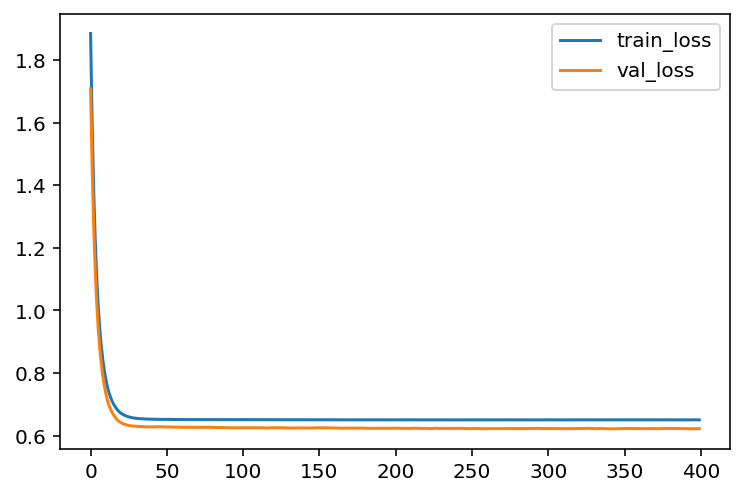

In [17]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

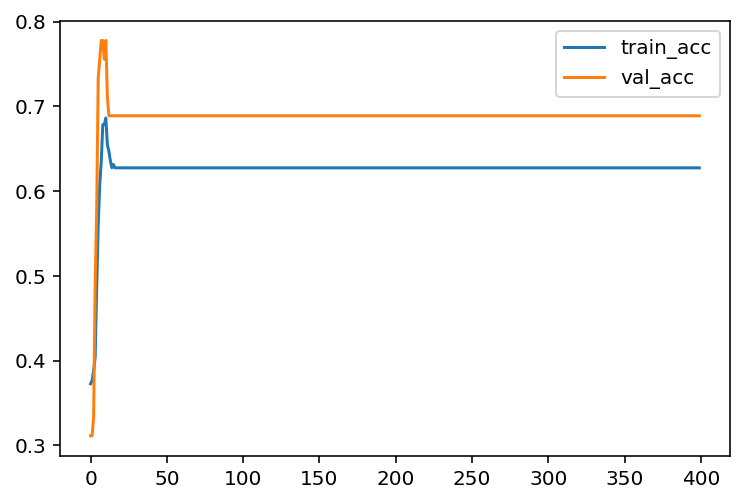

In [18]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()